In [1]:
from nba_api.stats.endpoints import leagueleaders
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from nba_api.stats.endpoints import leaguedashplayerstats
from nba_api.stats.endpoints import teamyearbyyearstats, playercareerstats

from matplotlib.offsetbox import OffsetImage, AnnotationBbox, DrawingArea, TextArea
from matplotlib.patches import Circle, FancyArrowPatch, FancyArrow, ArrowStyle, Arrow
import matplotlib.ticker as mtick
import time
from tqdm import tqdm
from sklearn.cluster import KMeans
import numpy as np



from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

plt.style.use('fivethirtyeight')

/var/folders/wg/8c_xwvyn2tl18ply9w25rmgm0000gn/T/ipykernel_29791/192306359.py:14: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [20]:
regular_all_players_advanced = leaguedashplayerstats.LeagueDashPlayerStats(measure_type_detailed_defense='Advanced', per_mode_detailed='PerGame', season='2022-23', season_type_all_star='Regular Season').get_data_frames()[0]

time.sleep(0.5)

regular_all_players_basic = leaguedashplayerstats.LeagueDashPlayerStats(per_mode_detailed='PerGame', season='2022-23', season_type_all_star='Regular Season').get_data_frames()[0]

In [23]:
regular_all_players = pd.merge(regular_all_players_basic, regular_all_players_advanced, on=["PLAYER_ID", "TEAM_ID", 'PLAYER_NAME'])

In [30]:
for column in regular_all_players.columns:
    if '_x' in column:
        continue
    else:
        print(column)

PLAYER_ID
PLAYER_NAME
TEAM_ID
FG3M
FG3A
FG3_PCT
FTM
FTA
FT_PCT
OREB
DREB
REB
AST
TOV
STL
BLK
BLKA
PF
PFD
PTS
PLUS_MINUS
NBA_FANTASY_PTS
DD2
TD3
WNBA_FANTASY_PTS
FG3M_RANK
FG3A_RANK
FG3_PCT_RANK
FTM_RANK
FTA_RANK
FT_PCT_RANK
OREB_RANK
DREB_RANK
REB_RANK
AST_RANK
TOV_RANK
STL_RANK
BLK_RANK
BLKA_RANK
PF_RANK
PFD_RANK
PTS_RANK
PLUS_MINUS_RANK
NBA_FANTASY_PTS_RANK
DD2_RANK
TD3_RANK
WNBA_FANTASY_PTS_RANK
NICKNAME_y
TEAM_ABBREVIATION_y
AGE_y
GP_y
W_y
L_y
W_PCT_y
MIN_y
E_OFF_RATING
OFF_RATING
sp_work_OFF_RATING
E_DEF_RATING
DEF_RATING
sp_work_DEF_RATING
E_NET_RATING
NET_RATING
sp_work_NET_RATING
AST_PCT
AST_TO
AST_RATIO
OREB_PCT
DREB_PCT
REB_PCT
TM_TOV_PCT
E_TOV_PCT
EFG_PCT
TS_PCT
USG_PCT
E_USG_PCT
E_PACE
PACE
PACE_PER40
sp_work_PACE
PIE
POSS
FGM_y
FGA_y
FGM_PG
FGA_PG
FG_PCT_y
GP_RANK_y
W_RANK_y
L_RANK_y
W_PCT_RANK_y
MIN_RANK_y
E_OFF_RATING_RANK
OFF_RATING_RANK
sp_work_OFF_RATING_RANK
E_DEF_RATING_RANK
DEF_RATING_RANK
sp_work_DEF_RATING_RANK
E_NET_RATING_RANK
NET_RATING_RANK
sp_work_NET_RATING

In [35]:
players = regular_all_players[regular_all_players['MIN_x'] > 30]
players = players[players['GP_x'] > 40]

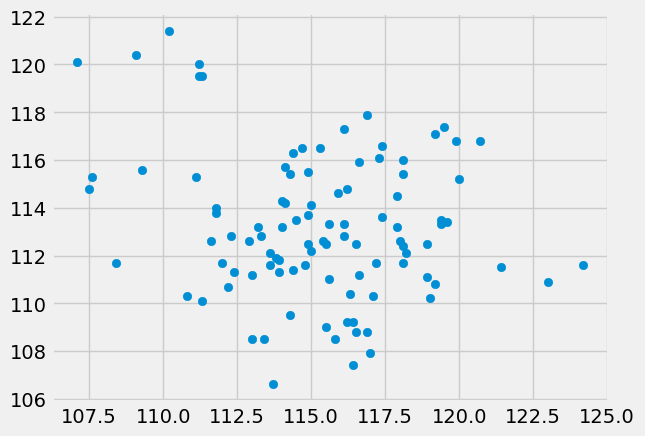

In [40]:
plt.scatter(players['OFF_RATING'], players['DEF_RATING'])
plt.plot([league_avg_off_rtg], league_avg_def_rtg)

In [37]:
players.sort_values(by=['OFF_RATING', 'DEF_RATING'], ascending=False)

,PLAYER_ID,PLAYER_NAME,NICKNAME_x,TEAM_ID,TEAM_ABBREVIATION_x,AGE_x,GP_x,W_x,L_x,W_PCT_x,...,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK_y,FGA_RANK_y,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK_y
399,203999,Nikola Jokic,Nikola,1610612743,DEN,28.0,69,48,21,0.696,...,51,302,356,356,4,13,47,16,59,34
3,203932,Aaron Gordon,Aaron,1610612743,DEN,27.0,68,45,23,0.662,...,142,330,378,378,118,69,99,75,106,68
304,203484,Kentavious Caldwell-Pope,Kentavious,1610612743,DEN,30.0,76,51,25,0.671,...,421,295,339,339,414,128,123,172,163,248
130,1627734,Domantas Sabonis,Domantas,1610612758,SAC,27.0,79,47,32,0.595,...,131,269,351,351,21,24,60,54,88,43
175,203084,Harrison Barnes,Harrison,1610612758,SAC,30.0,82,48,34,0.585,...,291,233,267,267,252,93,95,130,132,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1631095,Jabari Smith Jr.,Jabari,1610612745,HOU,20.0,79,21,58,0.266,...,226,287,360,360,325,97,67,126,104,426
169,202330,Gordon Hayward,Gordon,1610612766,CHA,33.0,50,20,30,0.400,...,169,101,154,154,177,144,143,99,92,219
297,1626162,Kelly Oubre Jr.,Kelly,1610612766,CHA,27.0,48,16,32,0.333,...,57,148,251,251,219,104,86,50,37,357
415,1629023,P.J. Washington,P.J.,1610612766,CHA,24.0,73,24,49,0.329,...,157,84,136,136,289,65,54,82,71,308


In [41]:
league_avg_off_rtg = regular_all_players['OFF_RATING'].mean()
league_avg_def_rtg = regular_all_players['DEF_RATING'].mean()

print(league_avg_off_rtg, league_avg_def_rtg)

109.87717996289426 111.43339517625233


In [47]:
off_rtg_list = np.array(players['OFF_RATING'])
def_rtg_list = np.array(players['DEF_RATING'])

In [54]:
X = np.vstack((off_rtg_list, def_rtg_list)).T

kmeans = KMeans(n_clusters=3, n_init="auto").fit(X)

labels = kmeans.labels_

In [57]:
x_with_labels = np.vstack((off_rtg_list, def_rtg_list, labels)).T

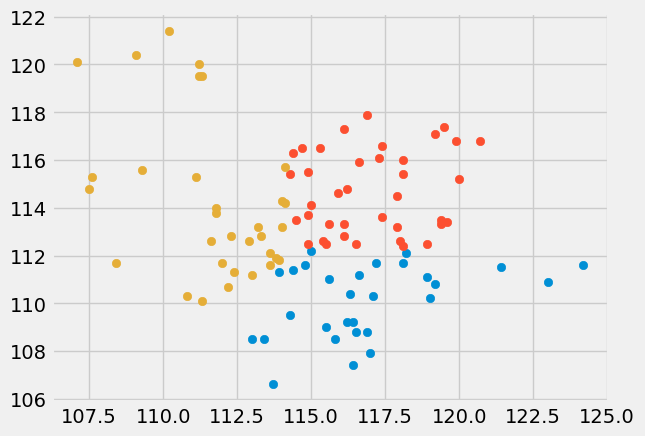

In [75]:
for g in np.unique(labels):
    i = np.where(labels == g)
    plt.scatter(off_rtg_list[i], def_rtg_list[i], label=g)
    
    
# plt.legend()
plt.savefig('off_def_rtg_groups.png')

In [64]:
players[(players['OFF_RATING'] == off_rtg_list[0]) & (players['DEF_RATING'] == def_rtg_list[0])]

,PLAYER_ID,PLAYER_NAME,NICKNAME_x,TEAM_ID,TEAM_ABBREVIATION_x,AGE_x,GP_x,W_x,L_x,W_PCT_x,...,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK_y,FGA_RANK_y,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK_y
3,203932,Aaron Gordon,Aaron,1610612743,DEN,27.0,68,45,23,0.662,...,142,330,378,378,118,69,99,75,106,68


In [74]:
kmeans.cluster_centers_


array([[116.82758621, 110.1       ],
       [117.01578947, 114.68157895],
       [111.678125  , 114.234375  ]])